In [1]:
import torch 
from torchvision import datasets, transforms
import numpy as np 
import matplotlib.pyplot as plt 
import torch.nn.functional as F
import torch.nn as nn 

In [2]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,),(0.5,))])

training_dataset = datasets.MNIST(root = './', train=True, download = True, transform=transform)

training_loader = torch.utils.data.DataLoader(training_dataset, batch_size=100, shuffle=True)

In [13]:
epochs = 12
running_loss_hist = list()
for e in range(epochs):
    running_loss = 0.0
    for images, labels in training_loader: 
        images = images.view(images.shape[0], -1)
        output = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    else: 
        epoch_loss = running_loss/ len(training_loader)
        running_loss_hist.append(epoch_loss)
        print('training loss', epoch_loss)

NameError: name 'outputs' is not defined

In [12]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01) 

In [11]:
model = ClassifierModule(784, 125, 65, 10)
model

ClassifierModule(
  (linear1): Linear(in_features=784, out_features=125, bias=True)
  (linear2): Linear(in_features=125, out_features=65, bias=True)
  (linear3): Linear(in_features=65, out_features=10, bias=True)
)

In [8]:
# define model 
class ClassifierModule(nn.Module):
    #number of input nodes, number of hidden layer nodes 
    def __init__(self):
        super().__init__()
        nn.Conv2d(1,)
        self.linear1 = nn.Linear(D_in,H1)
        self.linear2 = nn.Linear(H1,H2)
        self.linear3 = nn.Linear(H2,D_out)
        
    def forward(self, x):
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        x = self.linear3(x)
        return x

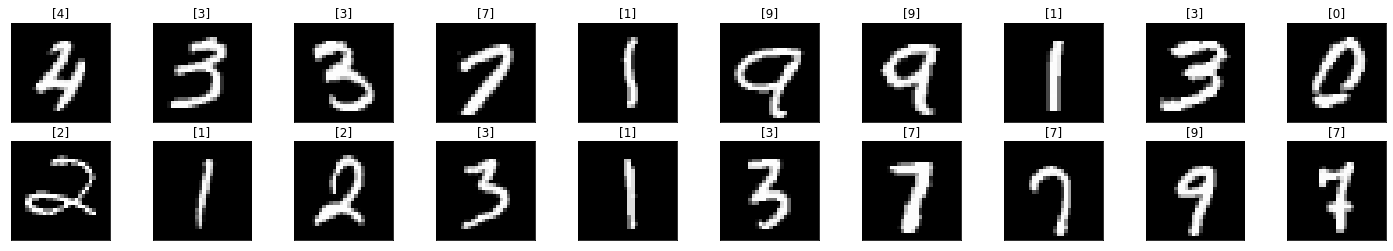

In [6]:
fig = plt.figure(figsize=(25, 4))

for idx in np.arange(20):
    ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
    plt.imshow(im_convert(images[idx]))
    ax.set_title([labels[idx].item()])

In [5]:
dataiter = iter(training_loader)
images, labels = dataiter.next()
print(images[0].shape)

torch.Size([1, 28, 28])


In [4]:
def im_convert(tensor):
    image = tensor.clone().detach().numpy()
    image = image.transpose(1, 2, 0)
    image = image * np.array((0.5, 0.5, 0.5)) + np.array((0.5, 0.5, 0.5))
    image = image.clip(0, 1)
    return image

In [3]:
training_dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )

In [ ]:
import zipfile
with zipfile.ZipFile('./train_signature.zip', 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)